<a href="https://colab.research.google.com/github/granja17/FootballPredict/blob/main/Projeto_IACH_parte_final_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [1]:
import os
import datetime
import tensorflow as tf
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
nome_do_arquivo = '/content/Big 5 2010 - 2020 - att.csv'

df = pd.read_csv(nome_do_arquivo, sep=';')
filtro = (df['Movement'] == 'in')
df = df.loc[filtro]

pd.to_numeric(df.Fee)
pd.to_numeric(df.Age)
df['Is Loan'] = df['Is Loan'].astype(str)
df['Age'] = df['Age'].astype(int)
df['Fee'].fillna(0, inplace=True)
df['Fee'] = df['Fee'].astype(int)
df['Season'] = pd.to_datetime(df['Season'], format='%Y')
df['Season'] = df['Season'].dt.strftime('%Y')
df.rename(columns={'Market Value ': 'Market Value'}, inplace=True)
df.info('Age')
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11945 entries, 0 to 36539
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Club             11945 non-null  object
 1   Player           11945 non-null  object
 2   Age              11945 non-null  int64 
 3   Nationality      11945 non-null  object
 4   Position         11945 non-null  object
 5   Short Position   11945 non-null  object
 6   Market Value     11945 non-null  int64 
 7   Dealing Club     11945 non-null  object
 8   Dealing Country  11689 non-null  object
 9   Fee              11945 non-null  int64 
 10  Movement         11945 non-null  object
 11  Window           11945 non-null  object
 12  League           11945 non-null  object
 13  Season           11945 non-null  object
 14  Is Loan          11945 non-null  object
 15  Loan Status      296 non-null    object
dtypes: int64(3), object(13)
memory usage: 1.5+ MB


<ipython-input-2-ddcb06ab02b2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is Loan'] = df['Is Loan'].astype(str)
<ipython-input-2-ddcb06ab02b2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype(int)
<ipython-input-2-ddcb06ab02b2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fee

,Club,Player,Age,Nationality,Position,Short Position,Market Value,Dealing Club,Dealing Country,Fee,Movement,Window,League,Season,Is Loan,Loan Status
0,Paris Saint-Germain,Neymar,25,Brazil,Left Winger,Attacker,100000000,FC Barcelona,Spain,222000000,in,summer,Ligue 1,2017,False,NaN
3,Paris Saint-Germain,Kylian Mbappé,19,France,Centre-Forward,Attacker,120000000,Monaco,France,180000000,in,summer,Ligue 1,2018,False,NaN
5,FC Barcelona,Philippe Coutinho,25,Brazil,Attacking Midfield,Midfielder,90000000,Liverpool,England,135000000,in,winter,Laliga,2017,False,NaN
6,FC Barcelona,Ousmane Dembélé,20,France,Right Winger,Attacker,33000000,Bor. Dortmund,Germany,135000000,in,summer,Laliga,2017,False,NaN
8,Atlético Madrid,João Félix,19,Portugal,Second Striker,Attacker,70000000,Benfica,Portugal,127200000,in,summer,Laliga,2019,False,NaN


In [3]:
df.set_index('Season', drop=True, inplace=True)
df.head()


,Club,Player,Age,Nationality,Position,Short Position,Market Value,Dealing Club,Dealing Country,Fee,Movement,Window,League,Is Loan,Loan Status
Season,,,,,,,,,,,,,,,
2017,Paris Saint-Germain,Neymar,25,Brazil,Left Winger,Attacker,100000000,FC Barcelona,Spain,222000000,in,summer,Ligue 1,False,NaN
2018,Paris Saint-Germain,Kylian Mbappé,19,France,Centre-Forward,Attacker,120000000,Monaco,France,180000000,in,summer,Ligue 1,False,NaN
2017,FC Barcelona,Philippe Coutinho,25,Brazil,Attacking Midfield,Midfielder,90000000,Liverpool,England,135000000,in,winter,Laliga,False,NaN
2017,FC Barcelona,Ousmane Dembélé,20,France,Right Winger,Attacker,33000000,Bor. Dortmund,Germany,135000000,in,summer,Laliga,False,NaN
2019,Atlético Madrid,João Félix,19,Portugal,Second Striker,Attacker,70000000,Benfica,Portugal,127200000,in,summer,Laliga,False,NaN


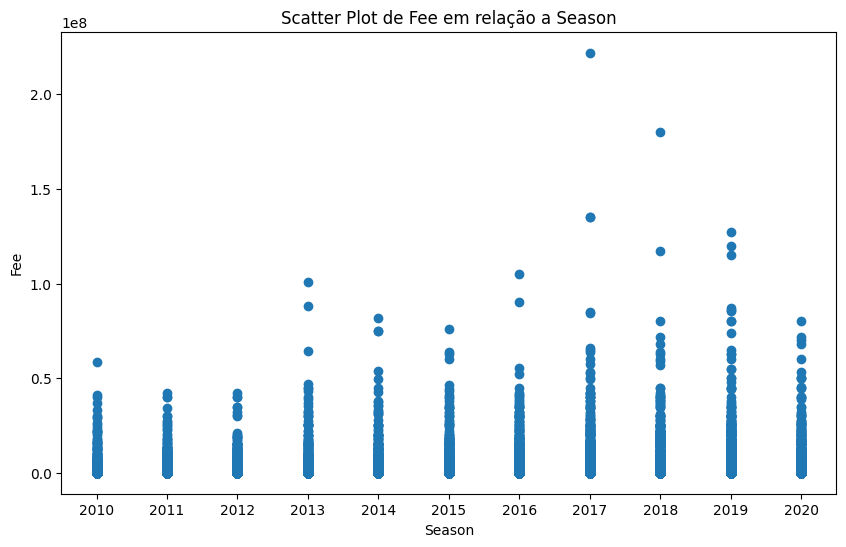

In [4]:
# Ordenação por 'Season'
df = df.sort_values(by='Season')

#scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Fee'])
plt.xlabel('Season')
plt.ylabel('Fee')
plt.title('Scatter Plot de Fee em relação a Season')
plt.show()


# Definindo Labels

In [5]:
condicoes = [
    (df['Fee'] > 60000000),
    (df['Fee'] >= 50000000) & (df['Fee'] <= 60000000),
    (df['Fee'] >= 40000000) & (df['Fee'] < 50000000),
    (df['Fee'] >= 30000000) & (df['Fee'] < 40000000),
    (df['Fee'] >= 20000000) & (df['Fee'] < 30000000),
    (df['Fee'] >= 10000000) & (df['Fee'] < 20000000),
    (df['Fee'] > 5000000) & (df['Fee'] < 10000000),
    (df['Fee'] > 0) & (df['Fee'] < 5000000),
    (df['Fee'] == 0)
]

valores = ['A++', 'A+', 'A', 'B+', 'B', 'C+', 'C', 'C-', 'D']

df['Classificacao'] = np.select(condicoes, valores, default='D')

df = df.sort_values(by='Fee', ascending=False)


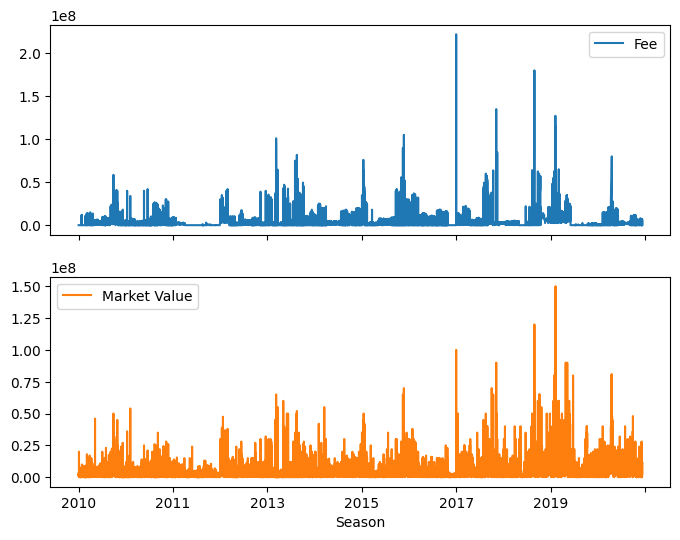

In [6]:
df = df.sort_values(by = 'Season', ascending = True)
plot_cols = ['Fee', 'Market Value']
plot_features = df[plot_cols]
plot_features.index = df.index
_ = plot_features.plot(subplots=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11945 entries, 2010 to 2020
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Club             11945 non-null  object
 1   Player           11945 non-null  object
 2   Age              11945 non-null  int64 
 3   Nationality      11945 non-null  object
 4   Position         11945 non-null  object
 5   Short Position   11945 non-null  object
 6   Market Value     11945 non-null  int64 
 7   Dealing Club     11945 non-null  object
 8   Dealing Country  11689 non-null  object
 9   Fee              11945 non-null  int64 
 10  Movement         11945 non-null  object
 11  Window           11945 non-null  object
 12  League           11945 non-null  object
 13  Is Loan          11945 non-null  object
 14  Loan Status      296 non-null    object
 15  Classificacao    11945 non-null  object
dtypes: int64(3), object(13)
memory usage: 1.5+ MB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,11945.0,2.467953e+01,4.132550e+00,15.0,21.0,24.0,27.0,42.0
Market Value,11945.0,4.626303e+06,7.644412e+06,0.0,800000.0,2000000.0,5000000.0,150000000.0
Fee,11945.0,3.378881e+06,8.566973e+06,0.0,0.0,300000.0,3000000.0,222000000.0


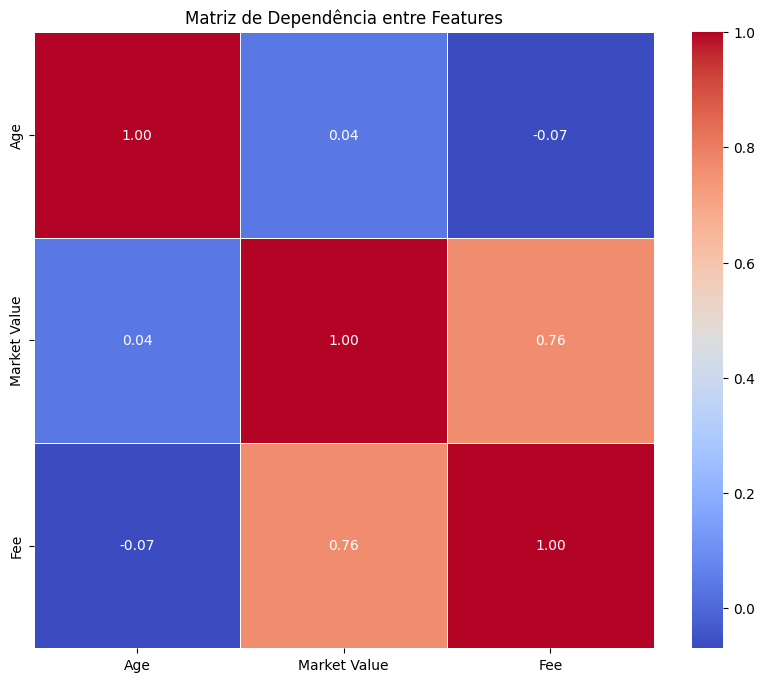

In [9]:
numeric_cols = df.select_dtypes(include=['int64']).columns
numeric_data = df[numeric_cols]

# matriz de correlação
correlation_matrix = numeric_data.corr()

# mapa de calor para visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Dependência entre Features')
plt.show()


In [10]:
pip install scikit-learn


In [11]:
df.index = df.index.astype(int)

# treino (2010 a 2019) e teste (2020)
train_data = df[df.index < 2020]
test_data = df[df.index == 2020]

# features (X) e label (y)
X_train = train_data.drop("Classificacao", axis=1)
y_train = train_data["Classificacao"]

X_test = test_data.drop("Classificacao", axis=1)
y_test = test_data["Classificacao"]

# valores nulos
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

# modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# previsões no conjunto de teste
predictions = model.predict(X_test)

# desempenho do modelo
accuracy = accuracy_score(y_test, predictions)
print(f"Acurácia do modelo: {accuracy}")

# o relatório de classificação
print(classification_report(y_test, predictions))


Acurácia do modelo: 0.8329383886255924
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         6
          A+       0.00      0.00      0.00         5
         A++       0.00      0.00      0.00         4
           B       0.53      0.36      0.43        28
          B+       1.00      0.22      0.36         9
           C       0.62      0.16      0.26        62
          C+       0.54      0.42      0.47        67
          C-       0.72      1.00      0.84       259
           D       1.00      0.98      0.99       404

    accuracy                           0.83       844
   macro avg       0.49      0.35      0.37       844
weighted avg       0.82      0.83      0.80       844



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


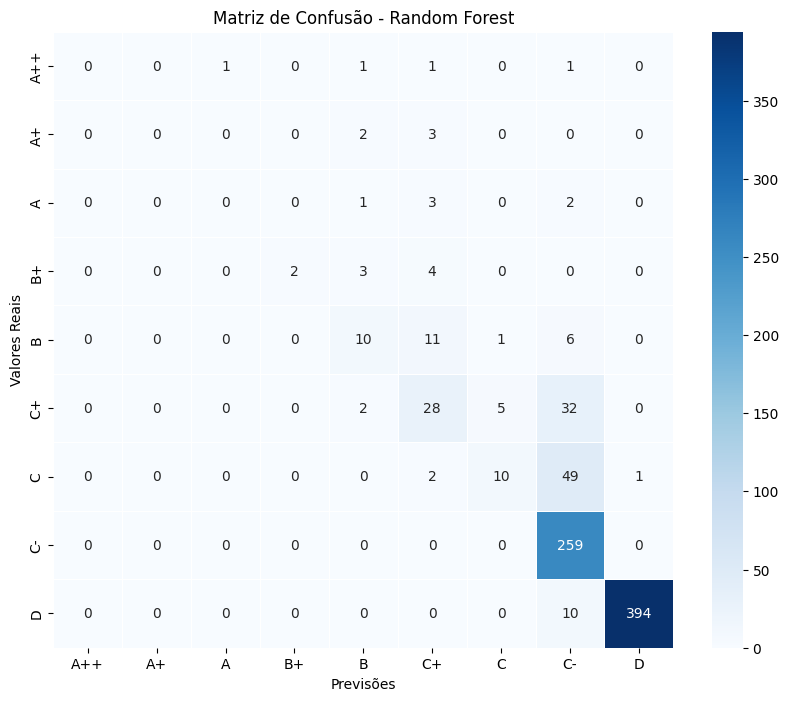

In [12]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, predictions, labels=['A++', 'A+', 'A', 'B+', 'B', 'C+', 'C', 'C-', 'D'])


conf_matrix_df = pd.DataFrame(conf_matrix, index=['A++', 'A+', 'A', 'B+', 'B', 'C+', 'C', 'C-', 'D'], columns=['A++', 'A+', 'A', 'B+', 'B', 'C+', 'C', 'C-', 'D'])

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão - Random Forest')
plt.show()


                        Feature  Importância
1569                        Fee     0.316448
1581               Market Value     0.063244
0                           Age     0.033887
1571               Is Loan_True     0.019090
1570              Is Loan_False     0.015011
1580  Loan Status_loan with fee     0.005462
1575      League_Premier League     0.005273
8290    Short Position_Attacker     0.005084
8291    Short Position_Defender     0.004956
8293  Short Position_Midfielder     0.004815


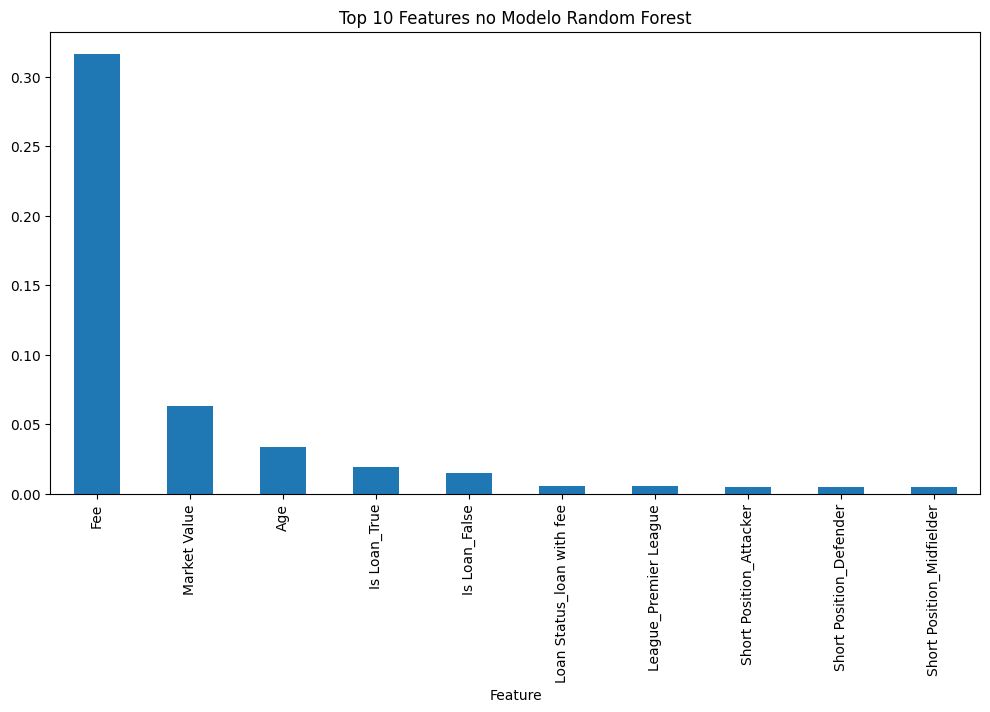

In [13]:
# one-hot para variáveis categóricas
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

#colunas em X_train e X_test são iguais após a codificação
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

# Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_encoded, y_train)

# importância das features
importancias_features = model.feature_importances_
importancias_df = pd.DataFrame({'Feature': X_train_encoded.columns, 'Importância': importancias_features})
importancias_df = importancias_df.sort_values(by='Importância', ascending=False)

# top 10 features
top_10_features = importancias_df.head(10)
print(top_10_features)

# gráfico de barras das importâncias
top_10_features.plot(x='Feature', y='Importância', kind='bar', figsize=(12, 6), legend=False)
plt.title('Top 10 Features no Modelo Random Forest')
plt.show()
